In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab
import calendar
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import seaborn as sns
sns.set()
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline


# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv (r'C:\Users\reach\Dropbox\PC\Desktop\Recruitment_Task\Recruitment_Task\train_small.csv')
print (df)

         search_id            timestamp  site_id  user_country_id  \
0                4  2012-12-31 08:59:22        5              219   
1                4  2012-12-31 08:59:22        5              219   
2                4  2012-12-31 08:59:22        5              219   
3                4  2012-12-31 08:59:22        5              219   
4                4  2012-12-31 08:59:22        5              219   
5                4  2012-12-31 08:59:22        5              219   
6                4  2012-12-31 08:59:22        5              219   
7                4  2012-12-31 08:59:22        5              219   
8                4  2012-12-31 08:59:22        5              219   
9                4  2012-12-31 08:59:22        5              219   
10               4  2012-12-31 08:59:22        5              219   
11               4  2012-12-31 08:59:22        5              219   
12               4  2012-12-31 08:59:22        5              219   
13               4  2012-12-31 08:

In [3]:
df.shape

(2380557, 54)

In [4]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [5]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,2.380557e+06,59010.000000,63662.000000,46401.000000,965758.000000,1.016116e+06,2.639700e+05,731551.000000,788086.000000,225486.000000,148194.000000,165281.000000,6.286100e+04,1.065082e+06,1.131440e+06,401164.000000,119637.000000,129892.000000,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-24.398076,1.315759e+03,2.967369e-01,0.484138,0.027740,237.746471,0.043637,3.933803e-02,2.346923e+01,0.016820,0.058079,26.303225,-0.016074,0.096393,1.545803e+02,2.273252e-02,5.156084e-02,29.110785,0.130169,0.076156,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,16.129689,2.029315e+03,4.568196e-01,0.642136,0.221842,1134.932987,0.447474,2.351395e-01,2.803530e+03,0.457709,0.296175,923.119202,0.576637,0.337104,5.834964e+03,5.205086e-01,2.678607e-01,1469.481661,0.561416,0.301031,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000e+00,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.115000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.267400,1.427400e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,7.000000e+00,0.000000,0.00000

# Data Cleaning

In [6]:
round(100*(df.isnull().sum()/len(df.index)), 2)

search_id                          0.00
timestamp                          0.00
site_id                            0.00
user_country_id                    0.00
user_hist_stars                   94.84
user_hist_paid                    94.81
listing_country_id                 0.00
listing_id                         0.00
listing_stars                      0.00
listing_review_score               0.15
is_brand                           0.00
location_score1                    0.00
location_score2                   22.10
log_historical_price               0.00
listing_position                   0.00
price_usd                          0.00
has_promotion                      0.00
destination_id                     0.00
length_of_stay                     0.00
booking_window                     0.00
num_adults                         0.00
num_kids                           0.00
num_rooms                          0.00
stay_on_saturday                   0.00
log_click_proportion              93.61


In [7]:
# we will drop the columns having more than 70% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

# Now we will take care of null values in each column one by one.

In [8]:
round(100*(df.isnull().sum()/len(df.index)), 2)

search_id                        0.00
timestamp                        0.00
site_id                          0.00
user_country_id                  0.00
listing_country_id               0.00
listing_id                       0.00
listing_stars                    0.00
listing_review_score             0.15
is_brand                         0.00
location_score1                  0.00
location_score2                 22.10
log_historical_price             0.00
listing_position                 0.00
price_usd                        0.00
has_promotion                    0.00
destination_id                   0.00
length_of_stay                   0.00
booking_window                   0.00
num_adults                       0.00
num_kids                         0.00
num_rooms                        0.00
stay_on_saturday                 0.00
distance_to_dest                32.36
random_sort                      0.00
competitor2_rate                59.43
competitor2_has_availability    57.32
competitor3_

# Now let's analyze some of the variables

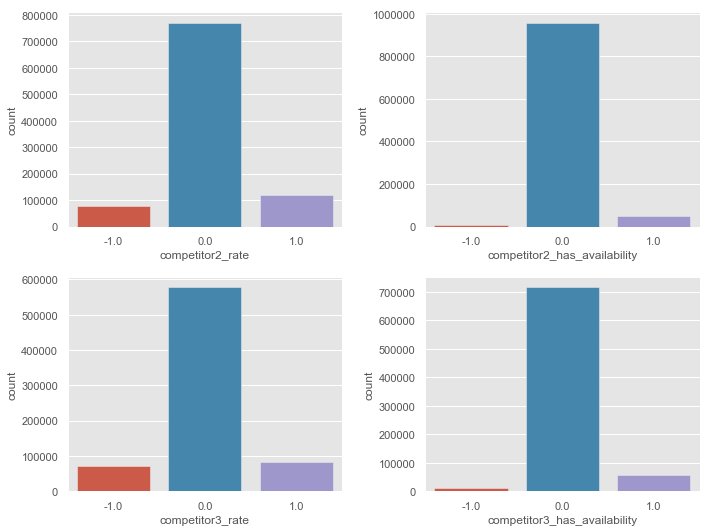

In [9]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(df['competitor2_rate'], ax = axs[0,0])
plt2 = sns.countplot(df['competitor2_has_availability'], ax = axs[0,1])
plt3 = sns.countplot(df['competitor3_rate'], ax = axs[1,0])
plt4 = sns.countplot(df['competitor3_has_availability'], ax = axs[1,1])
plt.tight_layout()

# There is too much variation in these parameters so its not reliable to impute any value in it. So, Dropping all from the data frame.
# Note - Not included the imputation for all variavles as similar kind of analysis was performed.

In [10]:
df1 = df.drop(columns = ['competitor2_rate','competitor2_has_availability','competitor3_rate','competitor3_has_availability','competitor5_rate','competitor5_has_availability','competitor8_rate','competitor8_has_availability','distance_to_dest','location_score2'])

# Let's Impute the variables with Mean

In [11]:
df1['listing_review_score'].mean()

3.7794157179150307

In [12]:
import random
def randomiseData(df2):
    df1 = df2.copy()
    for col in df1.columns:
        data = df1['listing_review_score']
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples
    return df1

In [13]:
df1 = randomiseData(df1)

In [14]:
df1.dropna(inplace = True)

In [15]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

search_id               0.0
timestamp               0.0
site_id                 0.0
user_country_id         0.0
listing_country_id      0.0
listing_id              0.0
listing_stars           0.0
listing_review_score    0.0
is_brand                0.0
location_score1         0.0
log_historical_price    0.0
listing_position        0.0
price_usd               0.0
has_promotion           0.0
destination_id          0.0
length_of_stay          0.0
booking_window          0.0
num_adults              0.0
num_kids                0.0
num_rooms               0.0
stay_on_saturday        0.0
random_sort             0.0
clicked                 0.0
booked                  0.0
dtype: float64

# Exploratory Data Analytics

In [16]:
Conversion_rate = (sum(df1['clicked'])/len(df1['booked'].index))*100
Conversion_rate

4.45668807762217

In [17]:
##Top Features Selection

from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

Filterd = df1.fillna(-999)
for f in Filterd.columns:
    if Filterd[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(Filterd[f].values)) 
        Filterd[f] = lbl.transform(list(Filterd[f].values))
        
train_y = Filterd.booked.values
train_X = Filterd.drop(["clicked", "search_id", "booked"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[10:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




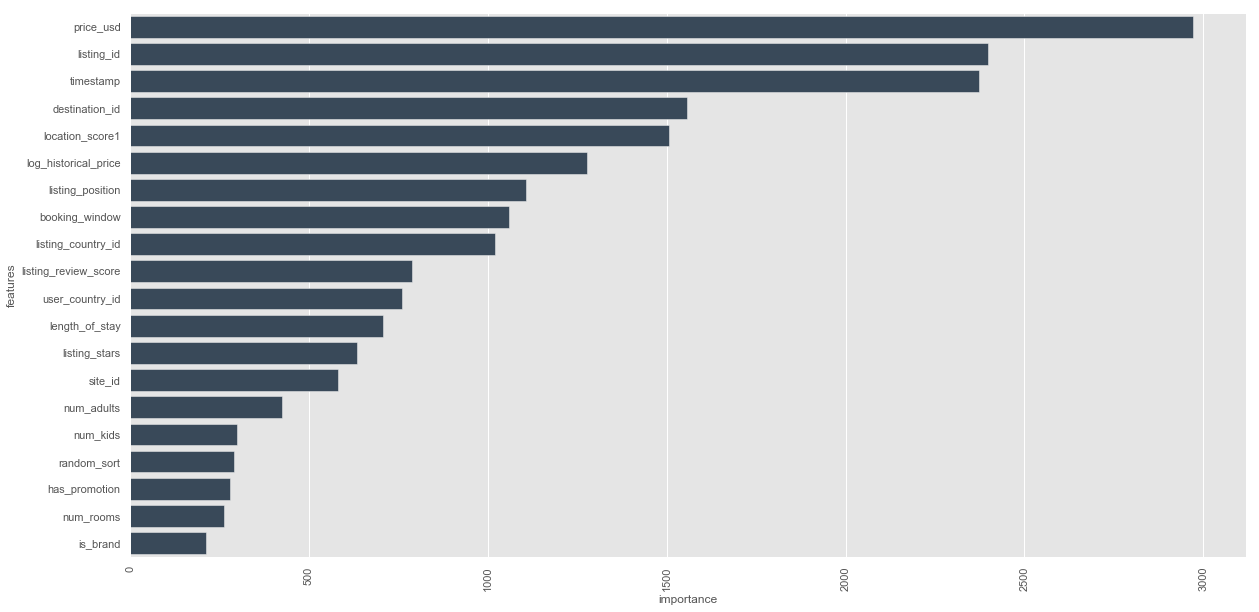

In [18]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(20),x="importance",y="features",ax=ax,orient="h",color="#34495e")

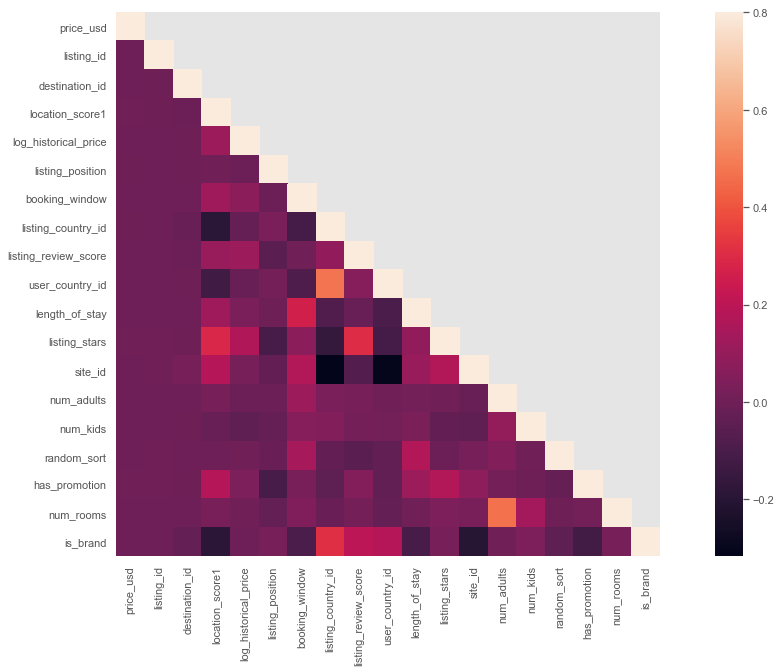

In [19]:
##Correlation Analysis

topFeatures = features["features"].tolist()[:20]
corrMatt = df1[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

# Multicollinearity Analysis

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

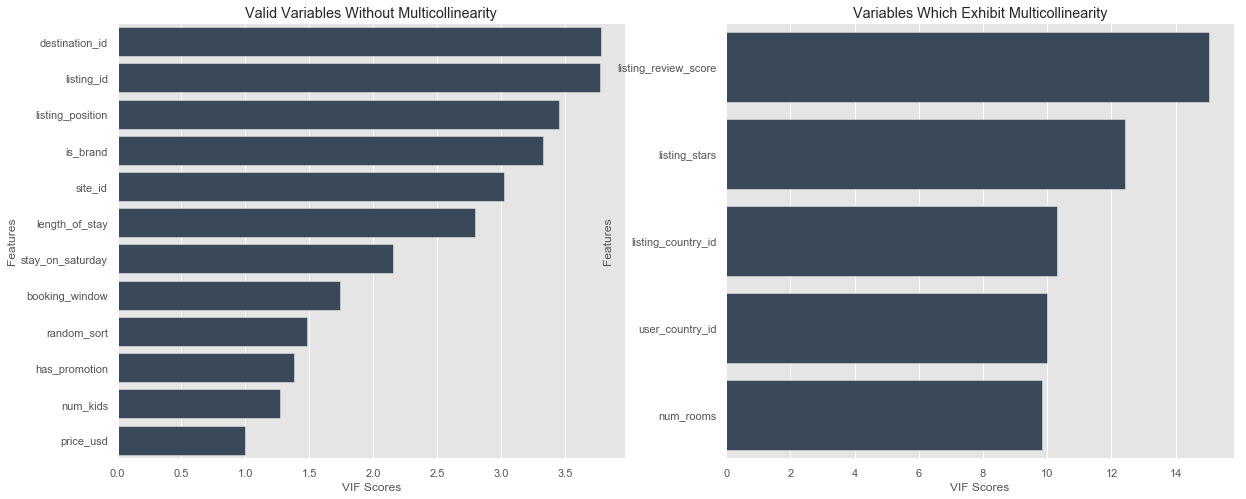

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in df1.columns:
    #print (f)
    if df1[f].dtype!='object' and f not in ["clicked", "search_id", "booked"]:
        numericalCol.append(f)
Filterd = df1[numericalCol].fillna(-999)
vifDict = calculate_vif_(Filterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

# Univariate Analysis
Dependent variable booked follows nice normal distribution

[Text(0, 0.5, 'VIF Score'),
 Text(0.5, 0, 'booked'),
 Text(0.5, 1.0, 'Distribution Of Dependent Variable')]

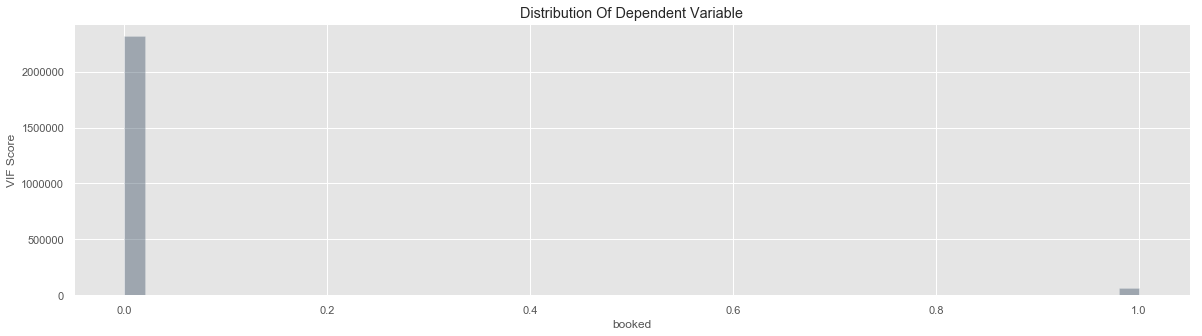

In [21]:
ulimit = np.percentile(df1.booked.values, 99)
llimit = np.percentile(df1.booked.values, 1)
df1['booked'].ix[df1['booked']>ulimit] = ulimit
df1['booked'].ix[df1['booked']<llimit] = llimit

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.distplot(df1.booked.values, bins=50,kde=False,color="#34495e",ax=ax)
ax.set(xlabel='booked', ylabel='VIF Score',title="Distribution Of Dependent Variable")

We can see the classes are imbalanced

# Bivariate Analysis

[Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 0, 'Month Of The Year'),
 Text(0.5, 1.0, 'No Of Occurunces Across Month In 2012-2013'),
 None]

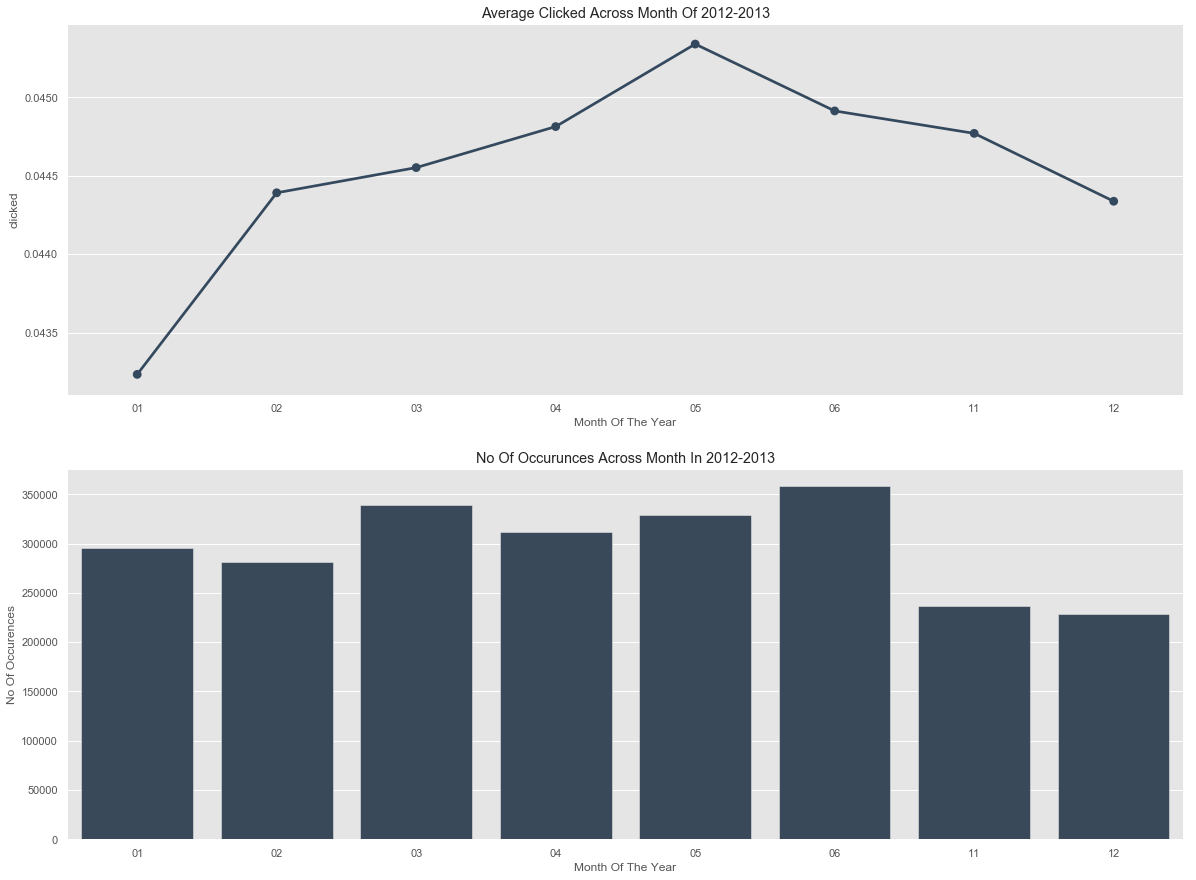

In [22]:
df1["year"] = df1.timestamp.map(lambda x: str(x).split("-")[0])
df1["month"] = df1.timestamp.map(lambda x: str(x).split("-")[1])
df1["day"] = df1.timestamp.map(lambda x: str(x).split("-")[2].split()[0])

dfgroupedMonth = df1.groupby(["month"])["clicked"].mean().to_frame().reset_index()
dfgroupedDay = df1.groupby(["day"])["clicked"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sns.pointplot(x=dfgroupedMonth["month"], y=dfgroupedMonth["clicked"], data=dfgroupedMonth, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='clicked',title="Average Clicked Across Month Of 2012-2013",label='big')

sns.countplot(x=df1["month"], data=df1,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2012-2013",label='big')

[Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 0, 'Month Of The Year'),
 Text(0.5, 1.0, 'No Of Occurunces Across Month In 2012-2013'),
 None]

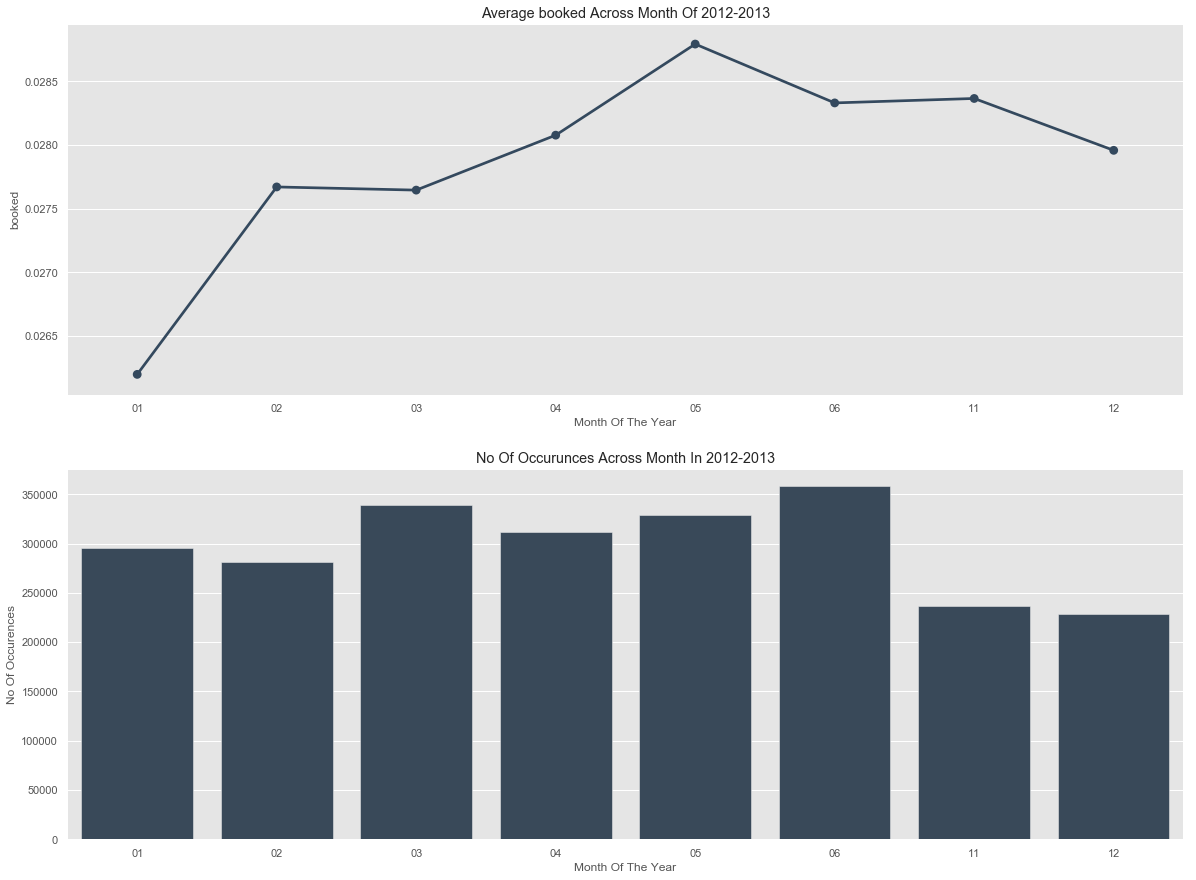

In [23]:
df1["year"] = df1.timestamp.map(lambda x: str(x).split("-")[0])
df1["month"] = df1.timestamp.map(lambda x: str(x).split("-")[1])
df1["day"] = df1.timestamp.map(lambda x: str(x).split("-")[2].split()[0])

dfgroupedMonth = df1.groupby(["month"])["booked"].mean().to_frame().reset_index()
dfgroupedDay = df1.groupby(["day"])["booked"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sns.pointplot(x=dfgroupedMonth["month"], y=dfgroupedMonth["booked"], data=dfgroupedMonth, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='booked',title="Average booked Across Month Of 2012-2013",label='big')

sns.countplot(x=df1["month"], data=df1,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2012-2013",label='big')

[Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 0, 'Day Of The Month'),
 Text(0.5, 1.0, 'No Of Occurences Across Days Of The Month In 2016'),
 None]

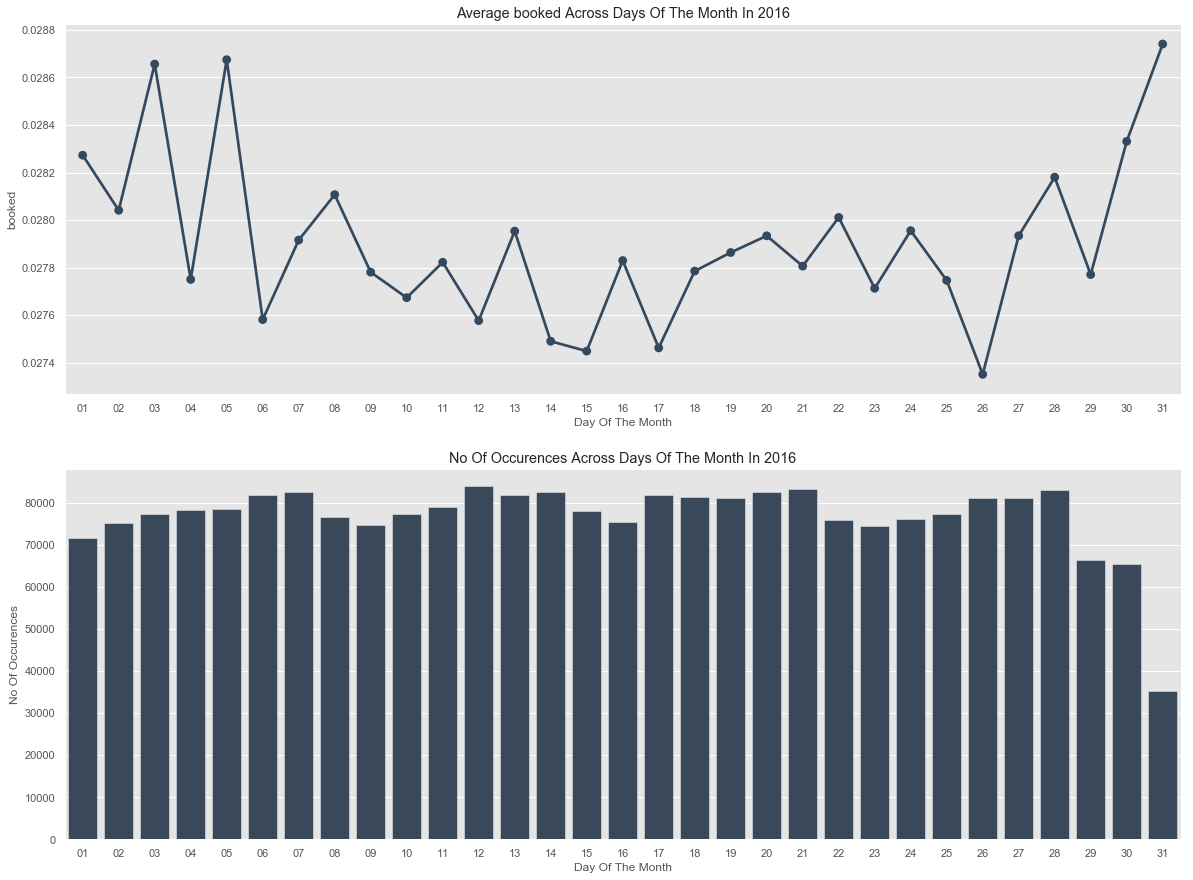

In [24]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)

sns.pointplot(x=dfgroupedDay["day"], y=dfgroupedDay["booked"], data=dfgroupedDay, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Day Of The Month', ylabel='booked',title="Average booked Across Days Of The Month In 2016",label='big')

sns.countplot(x=df1["day"], data=df1,ax=ax2,color="#34495e")
ax2.set(xlabel='Day Of The Month', ylabel='No Of Occurences',title="No Of Occurences Across Days Of The Month In 2016",label='big')

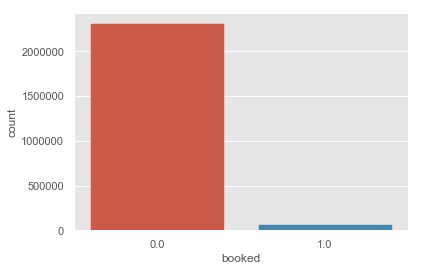

In [25]:
sns.countplot(x='booked',data=df1)

In [26]:
df1["booked"].value_counts() / len(df1)

0.0    0.972112
1.0    0.027888
Name: booked, dtype: float64

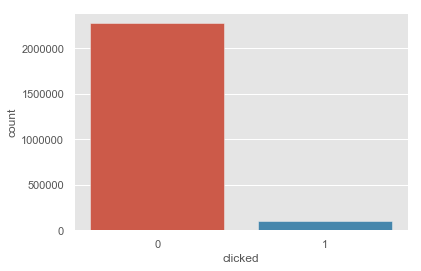

In [27]:
sns.countplot(x='clicked',data=df1)

In [28]:
df1["clicked"].value_counts() / len(df)

0    0.955433
1    0.044567
Name: clicked, dtype: float64

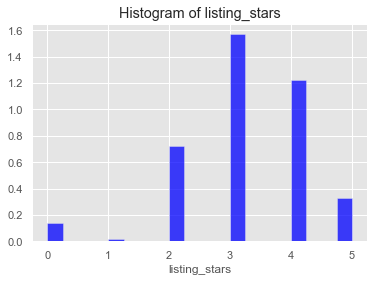

In [29]:
n, bins, patches = plt.hist(df1.listing_stars, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('listing_stars')
plt.title('Histogram of listing_stars')
plt.show();

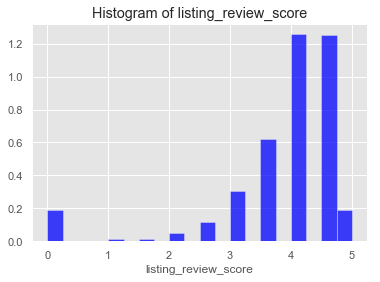

In [30]:
n, bins, patches = plt.hist(df1.listing_review_score, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('listing_review_score')
plt.title('Histogram of listing_review_score')
plt.show();

In [31]:
df['timestamp']= pd.to_datetime(df['timestamp'])

In [32]:
df.dtypes

search_id                                int64
timestamp                       datetime64[ns]
site_id                                  int64
user_country_id                          int64
listing_country_id                       int64
listing_id                               int64
listing_stars                            int64
listing_review_score                   float64
is_brand                                 int64
location_score1                        float64
location_score2                        float64
log_historical_price                   float64
listing_position                         int64
price_usd                              float64
has_promotion                            int64
destination_id                           int64
length_of_stay                           int64
booking_window                           int64
num_adults                               int64
num_kids                                 int64
num_rooms                                int64
stay_on_satur

In [33]:
df["timestamp"].dt.hour

0           8
1           8
2           8
3           8
4           8
5           8
6           8
7           8
8           8
9           8
10          8
11          8
12          8
13          8
14          8
15          8
16          8
17          8
18          8
19          8
20          8
21          8
22          8
23          8
24          8
25          8
26          8
27          8
28          8
29          8
30          8
31          8
32         10
33         10
34         10
35         10
36         10
37         10
38         10
39         10
40         10
41         10
42         10
43         10
44         10
45         10
46         10
47         10
48         10
49         10
           ..
2380507    10
2380508    10
2380509    10
2380510    10
2380511     9
2380512     9
2380513     9
2380514     9
2380515     9
2380516     9
2380517     9
2380518     9
2380519     9
2380520     9
2380521     9
2380522     9
2380523     9
2380524     9
2380525     9
2380526     9
238052

In [34]:
df["actual_hour_day"]= df["timestamp"].dt.hour

In [35]:
df.head(2)

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked,booked,actual_hour_day
0,4,2012-12-31 08:59:22,5,219,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8
1,4,2012-12-31 08:59:22,5,219,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8


In [36]:
imp= df.groupby(['actual_hour_day', 'booked']).size().unstack()

In [37]:
imp.head()

booked,0,1
actual_hour_day,,
0,35698,969
1,23373,651
2,15734,446
3,15003,450
4,21848,649


[]

<Figure size 432x288 with 0 Axes>

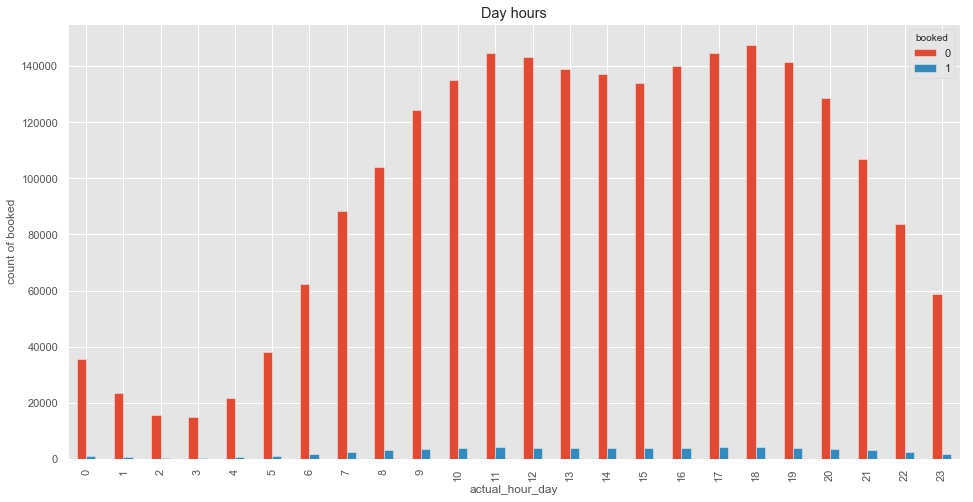

In [38]:
plt.figure()
imp.plot(kind='bar', title="Day hours", figsize=(16,8))
plt.ylabel("count of booked")
plt.plot()

# Conversion Rate

In [39]:
df1["clicked"].value_counts() / df1["booked"].value_counts()

0    0.982842
1    1.598090
dtype: float64

# Logistic Regression Model:Click Through Rate
Now I will use the logistic regression model to predict the click-through rate of the users:

In [40]:
x=df1.iloc[:,0:24]
x=x.drop(['timestamp','user_country_id','listing_country_id','location_score1','log_historical_price','listing_position','destination_id','length_of_stay','booking_window'],axis=1)
x

,search_id,site_id,listing_id,listing_stars,listing_review_score,is_brand,price_usd,has_promotion,num_adults,num_kids,num_rooms,stay_on_saturday,random_sort,clicked,booked
0,4,5,3625,4,4.0,0,295.00,0,1,0,1,1,1,0,0.0
1,4,5,11622,4,4.0,0,299.00,0,1,0,1,1,1,0,0.0
2,4,5,11826,5,4.5,1,373.00,1,1,0,1,1,1,0,0.0
3,4,5,22824,3,4.0,0,329.00,0,1,0,1,1,1,0,0.0
4,4,5,37581,5,4.5,0,600.00,0,1,0,1,1,1,0,0.0
5,4,5,39993,4,4.0,1,365.00,0,1,0,1,1,1,0,0.0
6,4,5,46162,4,4.5,0,331.00,1,1,0,1,1,1,0,0.0
7,4,5,49152,4,4.5,1,329.00,0,1,0,1,1,1,0,0.0
8,4,5,56063,4,4.5,0,259.00,0,1,0,1,1,1,0,0.0
9,4,5,56472,4,4.5,1,335.00,0,1,0,1,1,1,0,0.0


Booked as Dependent variable

In [41]:
y=df1.iloc[:,23]
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34         0.0
35         1.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
41         0.0
42         0.0
43         0.0
44         0.0
45         0.0
46         0.0
47         0.0
48         0.0
49         0.0
          ... 
2380507    0.0
2380508    0.0
2380509    0.0
2380510    0.0
2380511    0.0
2380512    0.0
2380513    0.0
2380514    0.0
2380515    0.0
2380516    0.0
2380517    0.0
2380518    0.0
2380519    0.0
2380520    0.0
2380521    0.0
2380522   

Now I will split the data into training and test sets. Here I will use 70 per cent of data as training and 30 per cent as testing:

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1666389, 15)
(1666389,)
(714168, 15)
(714168,)


In [43]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(C=0.01,random_state=0)
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [44]:
y_pred_proba=Lr.predict_proba(x_test)
print(y_pred_proba)

[[0.9916577  0.0083423 ]
 [0.99830848 0.00169152]
 [0.98159522 0.01840478]
 ...
 [0.93069948 0.06930052]
 [0.99516147 0.00483853]
 [0.93030191 0.06969809]]


Now let’s have a look at the accuracy of the model:

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9723132372214941


In [46]:
cols_to_drop = ['timestamp']
df1.drop(cols_to_drop, axis=1, inplace=True)

In [47]:
import numpy as np

click_indices = df1[df1.clicked == 1].index
random_indices = np.random.choice(click_indices, len(df1.loc[df1.clicked == 1]), replace=False)
click_sample = df1.loc[random_indices]

not_click = df1[df1.clicked == 0].index
random_indices = np.random.choice(not_click, sum(df1['clicked']), replace=False)
not_click_sample = df1.loc[random_indices]

df1_new = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(df1_new[df1_new.clicked == 0])/len(df1_new))
print("Percentage of click impression: ", len(df1_new[df1_new.clicked == 1])/len(df1_new))
print("Total number of records in resampled data: ", len(df1_new))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  212188


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms = MinMaxScaler()
df1_new[['price_usd']] = mms.fit_transform(df1_new[['price_usd']])

In [50]:
Y1=df1_new['clicked'].as_matrix()
Y2=df1_new['booked'].as_matrix()
df1_new=df1_new.drop(['clicked','booked'], 1)
X=df1_new.as_matrix()

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,Y1,test_size=0.3,random_state=1)

In [52]:
def get_ensemble_models():
    rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=51,random_state=42)
    classifier_list = [rf,bagg,grad]
    classifier_name_list = ['Random Forests','Bagging','Gradient Boost']
    return classifier_list,classifier_name_list

In [53]:
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")

In [54]:
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

           0       0.69      0.70      0.69     31903
           1       0.69      0.68      0.69     31754

    accuracy                           0.69     63657
   macro avg       0.69      0.69      0.69     63657
weighted avg       0.69      0.69      0.69     63657

Accuracy Score :  0.6899005608181347
---------------------------------------

--------- Model :  Bagging  ---------------

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     31903
           1       0.68      0.68      0.68     31754

    accuracy                           0.68     63657
   macro avg       0.68      0.68      0.68     63657
weighted avg       0.68      0.68      0.68     63657

Accuracy Score :  0.6809149033099267
---------------------------------------

--------- Model :  Gradient Boost  ---------------

              precision    recall  f1-sco